# TensorFlow 소개

![image](https://user-images.githubusercontent.com/118172599/234757684-23a35b83-5e41-4b86-bd12-7933c940cea4.png)

- 머신러닝을 위한 오픈소스 플랫폼 - 딥러닝 프레임워크
- 구글이 주도적으로 개발 - 구글 코랩에는 기본 장착
- Keras라고 하는 고수준 API를 병합

## Tensorflow의 의미
- Tensor : 벡터나 행렬
- Graph : 텐서가 흐르는 경로(혹은 공간)
- TensorFlow : 텐서가 Graph를 통해 흐른다

# 1.딥러닝의 기초 feat. Keras

- 신경망에서 아이디어를 얻어서 시작된 Neural Net

### 뉴런
![image](https://user-images.githubusercontent.com/118172599/234757945-2ed036ab-3a4f-4e5d-b331-b3d0245224b6.png)
- 구성요소 : 입력, 가중치, 활성화함수, 출력
- 가중치를 업데이트
- 처음에는 초기화를 통해 랜덤값을 넣고, 학습을 통해 가중치를 수렴시킴

### 레이어와 망(net)
![image](https://user-images.githubusercontent.com/118172599/234758143-32ca2003-019f-4912-bda0-a0c830f0144b.png)
- 뉴런이 모여서 layer를 구성하고, 망(net)이 됨

### 딥러닝
![image](https://user-images.githubusercontent.com/118172599/234758269-0cf9ea26-3816-438b-b77b-2daba5a4b743.png)
- 신경망이 깊어(많아)지면 깊은 신경망 Deep Learning이 됨

### 파이썬 시작

In [1]:
import numpy as np

raw_data = np.genfromtxt("../data/x09.txt", skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

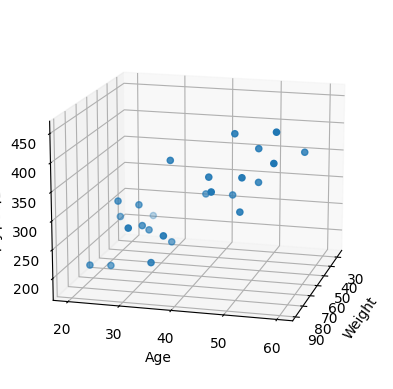

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15, 15)
plt.show()

## 간단한 딥러닝의 목표
- 입력데이터(나이, 몸무게)로 출력데이터(혈중 지방) 얻기
- 선형회귀
- 뉴런 1개 사용하기

### 현재 목표
![image](https://user-images.githubusercontent.com/118172599/234759402-f4781ef0-b1cd-4f4f-b398-9ef57e947619.png)

#### 데이터 전처리
- 계산식 : $y = XW + b$
- x는 피쳐가 2개로 (row, 2)의 구조이다
- w는 벡터 계산으로 1개의 값을 얻어야하므로 (2, 1)의 구조를 갖는다
- b는 1개의 칼럼으로 상수를 갖으므로 (row, 1)의 구조이다
- y_data는 (25,)이므로 (25,1)로 변경해서 배열계산이 가능한 구조로 변경한다

In [5]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

y_data = y_data.reshape((25,1))

#### Sequential
- model의 layer를 순차적(sequential)으로 만든다
- 다른 모델도 많지만 사용할 때 알아보자

#### Dense
- 레이어의 출력=다음 입력일 때 완전히 연결된 fully connected 라고 함
- 이것을 시각적으로 "빽빽하게" 선들이 연결되므로  "Dense"라고 줄여서 씀
- Dense(출력, 입력, 활성화 함수)(아래에서 활성화 함수는 생략)

#### model.compile
- model을 만들 때 compile을 사용함
- loss는 "Mean Square Error"를 사용하고
- 오차를 최적화할 optimizer는 "Root Mean Square Propatation"를 사용한다
  - _rmsprop는 기울기 강하의 속도를 증가시키는 알고리즘_

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,)),
])

model.compile(optimizer="rmsprop", loss="mse")

#### model.summary()
- model의 요약내용을 보여줌
- 총 3개의 파라미터(weight 2개, bias 1개)를 찾아야함

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


#### model.fit
- 모델을 학습시키는 명령어
- epochs: 반복횟수

In [12]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 1s 546ms/step - loss: 83969.2109
Epoch 2/5000
1/1 [==============================] - 0s 6ms/step - loss: 83771.1562
Epoch 3/5000
1/1 [==============================] - 0s 7ms/step - loss: 83627.7031
Epoch 4/5000
1/1 [==============================] - 0s 7ms/step - loss: 83507.7266
Epoch 5/5000
1/1 [==============================] - 0s 7ms/step - loss: 83401.3281
Epoch 6/5000
1/1 [==============================] - 0s 7ms/step - loss: 83303.9062
Epoch 7/5000
1/1 [==============================] - 0s 6ms/step - loss: 83212.9062
Epoch 8/5000
1/1 [==============================] - 0s 6ms/step - loss: 83126.7188
Epoch 9/5000
1/1 [==============================] - 0s 6ms/step - loss: 83044.2891
Epoch 10/5000
1/1 [==============================] - 0s 7ms/step - loss: 82964.8594
Epoch 11/5000
1/1 [==============================] - 0s 6ms/step - loss: 82887.8672
Epoch 12/5000
1/1 [==============================] - 0s 7ms/step - loss: 82812.9062

#### loss 그래프 해석
- loss는 빠르게 감소하여 약 epoch=2400부터 수렴하기 시작함
- 이런 그래프가 좋은 결과

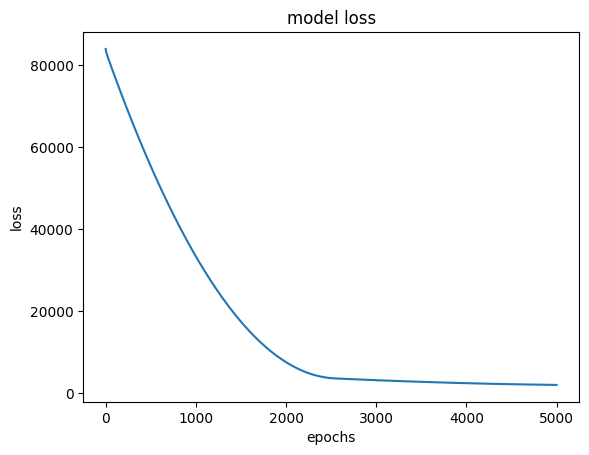

In [13]:
plt.plot(hist.history['loss'])
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [19]:
def model_predict(arr_data, model):
    arr_data = np.array(arr_data)
    return model.predict(arr_data.reshape(1,2))

In [20]:
model_predict([100, 44], model)

1/1 [==============================] - 0s 23ms/step


array([[385.33817]], dtype=float32)

In [21]:
model_predict([60, 25], model)

1/1 [==============================] - 0s 28ms/step


array([[226.60696]], dtype=float32)

#### 가중치와 bias 확인

In [24]:
W_, b_ = model.get_weights()
print("Weight is : \n", W_)
print("\nbias is : ", b_)

Weight is : 
 [[1.734947 ]
 [4.7017527]]

bias is :  [4.966333]


### test_data로 검증
- 임시로 검증데이터 제작

In [25]:
x = np.linspace(20, 100, 50).reshape(50, 1) # 몸무게
y = np.linspace(10, 70, 50).reshape(50, 1)  # 나이

X = np.concatenate((x,y), axis=1)           # 피쳐(몸무게+나이)
Z = np.matmul(X, W_) + b_           # 혈중 지방

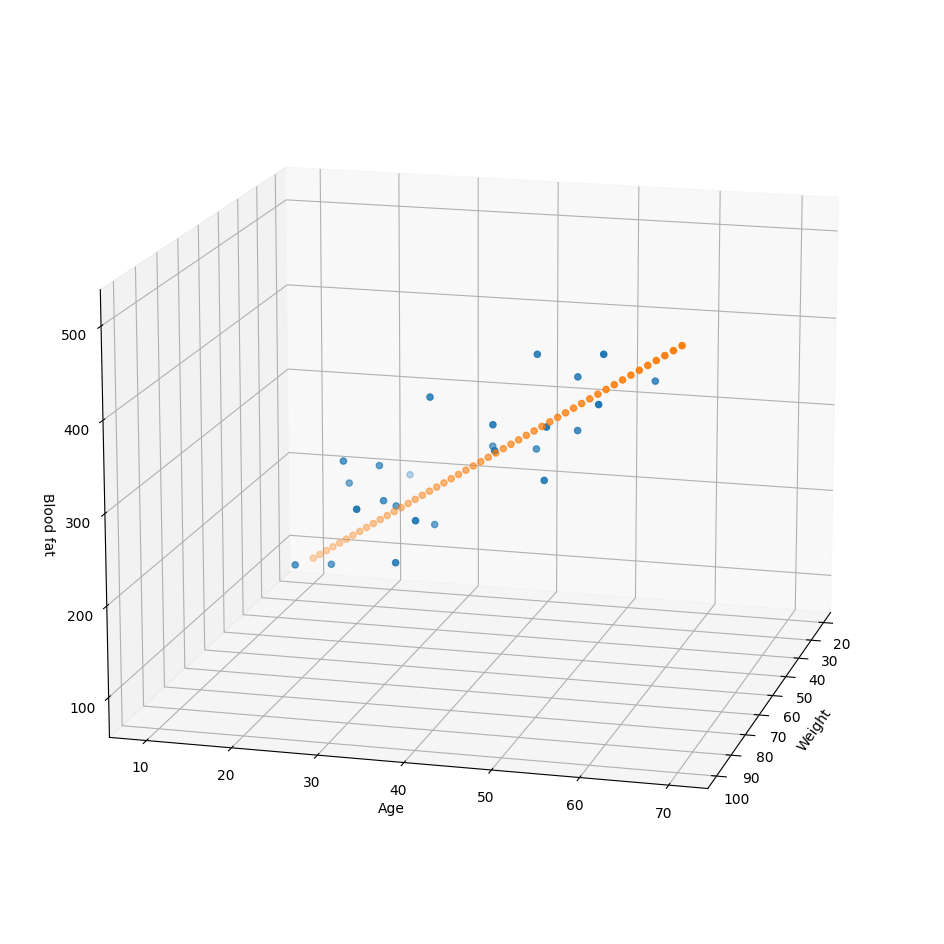

In [29]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15, 15)
plt.show()

# 2. XOR Problem

![image](https://user-images.githubusercontent.com/118172599/234765927-02da29c8-613d-4a27-bbf0-05e49fd6081a.png)
![image](https://user-images.githubusercontent.com/118172599/234765976-cc39e083-c5f8-441f-ae5e-a8ba54099f42.png)



In [56]:
import numpy as np

X = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])
y = np.array([[0],[1],[1],[0]])

#### 활성함수 sigmoid
- 모델이 복잡한 문제를 해결하기 위해서는 출력이 비선형이어야 한다
- layer의 결과가 비선형이되도록 "sigmoid"를 사용

- $s(z)=\frac{1}{1+e^{-z}}$

![image](https://velog.velcdn.com/images/insung_na/post/2bcbdb81-7e1c-4fd8-9bbd-f55e0d7ae3c5/image.png)

#### 아래 모델의 구조
![image](https://user-images.githubusercontent.com/118172599/234769079-fb58e9ee-86c7-445a-8dd0-ad4111e02b88.png)

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation="sigmoid", input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

#### optimizers.SGD
- Stochastic Gradient Descent(확률적경사하강법)
- 각 반복에서 무작위로 선택된 데이터 하위 집합의 기울기를 사용하여 매개변수를 업데이트
- 이러한 무작위성은 노이즈를 도입하여 모델이 지역 최소값에서 빠르게 탈출할 수 있게 해줌
- 대용량 데이터셋에서 효율적
- Adam, RMSEProp의 변형으로 사용됨

![image](https://user-images.githubusercontent.com/118172599/234779472-6f2229b6-abbd-46b0-9439-853edd8961c2.png)


In [58]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss="mse")

In [59]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#### epochs와 batch_size
- epochs : 전체 데이터를 학습하는 사이클을 의미하고 이를 몇번 할지 결정
- batch_size : 한번의 학습에 사용할 데이터 수
    - batch_size를 늘리면 속도가 빠르지만, 메모리가 많이 필요
    - batch_size를 감소시키면 학습이 덜 되므로 epochs의 증가가 필요
    - 이 둘을 최적화해서 사용하는 것이 중요

In [60]:
X.shape, y.shape

((4, 2), (4, 1))

In [61]:
hist = model.fit(X, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 2/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2641
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2628
Epoch 4/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 5/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2608
Epoch 6/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2599
Epoch 7/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2593
Epoch 8/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2587
Epoch 9/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2581
Epoch 10/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2576
Epoch 11/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2572
Epoch 12/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2568
Epoch 13/5000
4/4 [==============================

In [62]:
model.predict(X)

1/1 [==============================] - 0s 134ms/step


array([[0.04780162],
       [0.94222987],
       [0.94238436],
       [0.05789753]], dtype=float32)

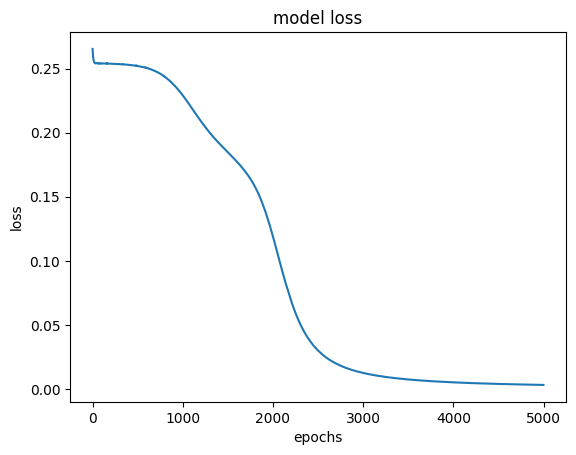

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history["loss"])
plt.title("model loss")
plt.xlabel("epochs"); plt.ylabel("loss")
plt.show()

In [64]:
for w in model.weights:
    print("---")
    print(w)

---
<tf.Variable 'dense_10/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.702813 ,  3.8606172],
       [-5.7497272,  3.8687992]], dtype=float32)>
---
<tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.0744014, -6.006867 ], dtype=float32)>
---
<tf.Variable 'dense_11/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-7.6260552],
       [-7.7683024]], dtype=float32)>
---
<tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([3.8022757], dtype=float32)>


## 2-1. 분류 feat.iris

In [67]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [70]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe.fit(y.reshape(len(y), 1))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [71]:
ohe.categories_

[array([0, 1, 2])]

In [72]:
y_ohe = ohe.transform(y.reshape(len(y), 1))
y_ohe

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

Net을 다음과 같이 구성한다
- 입력층 : 입력수 4개, 출력수 32개, 활성 relu
- 은닉층 : 활성 relu
- 출력층 : 출력수 3개, 활성 softmax

![image](https://user-images.githubusercontent.com/118172599/234773567-26d466a8-d9a9-4820-9946-131fc88afbcf.png)


#### 활성함수 softmax
- $softmax(x_i) = e^{x_i} / \sum_{j=1}^{n} e^{x_j}$
- 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수

#### 활성함수 ReLU
- $f(x) = max(0, x)$
- +/-가 반복되는 신호에서 -흐름을 차단

### 활성함수
#### sigmoid의 한계
![image](https://user-images.githubusercontent.com/118172599/234776620-9a70fed7-c8ac-4113-93ff-c0b6d9799368.png)

![image](https://user-images.githubusercontent.com/118172599/234776364-a427e968-4181-4ad5-a43b-83c881d478a3.png)

![image](https://user-images.githubusercontent.com/118172599/234776712-26611708-168c-437a-8c74-44824456e801.png)

#### gradient vanishing
![image](https://user-images.githubusercontent.com/118172599/234776823-18f643d5-e993-483b-b37f-019b427fe3b0.png)

#### ReLU
- Rectified Linear Units
- 은닉층은 대부분 ReLU를 사용

![image](https://user-images.githubusercontent.com/118172599/234776948-a113d677-823d-482c-b383-12e3d2fa51ae.png)

#### softmax
- 카테고리들 중 확률이 가장 높은 대상을 정답으로 판단

![image](https://user-images.githubusercontent.com/118172599/234777058-1a837440-7d88-47e7-98b3-440547df3f61.png)


## Optimizer 정리
- optimizer는 loss를 최적화 하는 알고리즘

![image](https://user-images.githubusercontent.com/118172599/234780099-9f3876a6-c3f3-47c5-bec2-df2b13737ecf.png)

![image](https://user-images.githubusercontent.com/118172599/234779848-81809183-c717-4b77-945d-48505588d603.png)


#### optimizers.Adam
- Adaptive Moment Estimation, Momentum + RMSProp


지수이동평균

`m_t = beta1 * m_{t-1} + (1 - beta1) * g_t`

`v_t = beta2 * v_{t-1} + (1 - beta2) * g_t^2`

편향보정

`m_t_hat = m_t / (1 - beta1^t)`

`v_t_hat = v_t / (1 - beta2^t)`

`w_t = w_{t-1} - alpha * m_t_hat / (sqrt(v_t_hat) + epsilon)`

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.2, random_state=13)

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax"),
])

In [ ]:
# tf.keras.optimizers.Adam
# tf.keras.losses.categorical_crossentropy
# 많이 사용하는 optimizer와 loss는 문자로 입력해도 가능

In [75]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                160       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [76]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.0497 - accuracy: 0.3500
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9938 - accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9350 - accuracy: 0.6917
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8845 - accuracy: 0.7667
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8436 - accuracy: 0.9250
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8030 - accuracy: 0.9500
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7626 - accuracy: 0.9583
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.9083
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.8000
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.7667
Epoch 11/100
4/4 [===========

In [78]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0776 - accuracy: 1.0000 - 29ms/epoch - 29ms/step


[0.07763615995645523, 1.0]

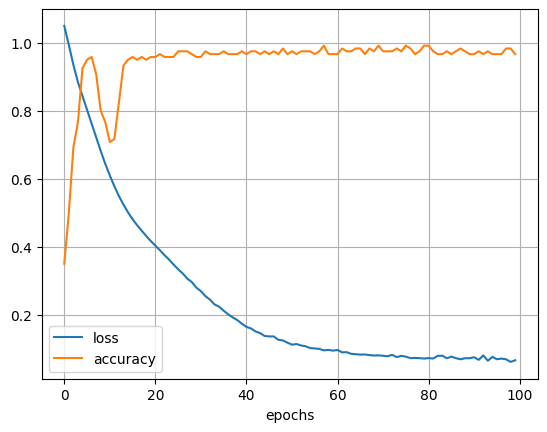

In [84]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["accuracy"])
plt.legend(["loss", "accuracy"])
plt.xlabel("epochs"); plt.grid()
plt.show()

# 3. MNIST
- 입력층 : (784, 1000)
- 은닉층 : (1000, 1000), activation="relu"
- 출력층 : (1000, 10), activation="softmax"

![image](https://user-images.githubusercontent.com/118172599/234789033-868b347f-ff18-4fae-aa16-0d21796cdb08.png)


In [85]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [96]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

## Encoding
- 명목형 범주데이터는 OneHotEncoding 후 loss=categorical_crossentropy를 사용해야 하지만
- loss=sparse_categorical_crossentropy는 모델에서 위 2가지를 실행한다

In [93]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss=tf.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [94]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 1000)              785000    
                                                                 
 dense_29 (Dense)            (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


#### model.fit

In [98]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print("Fit time : ", time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1456 - accuracy: 0.9567 - val_loss: 0.0921 - val_accuracy: 0.9713
Epoch 2/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0743 - accuracy: 0.9776 - val_loss: 0.0795 - val_accuracy: 0.9751
Epoch 3/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0484 - accuracy: 0.9855 - val_loss: 0.0653 - val_accuracy: 0.9789
Epoch 4/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0640 - val_accuracy: 0.9800
Epoch 5/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.0586 - val_accuracy: 0.9818
Epoch 6/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.0638 - val_accuracy: 0.9803
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0698 - val_accuracy: 0.9807

#### loss_acc_plot

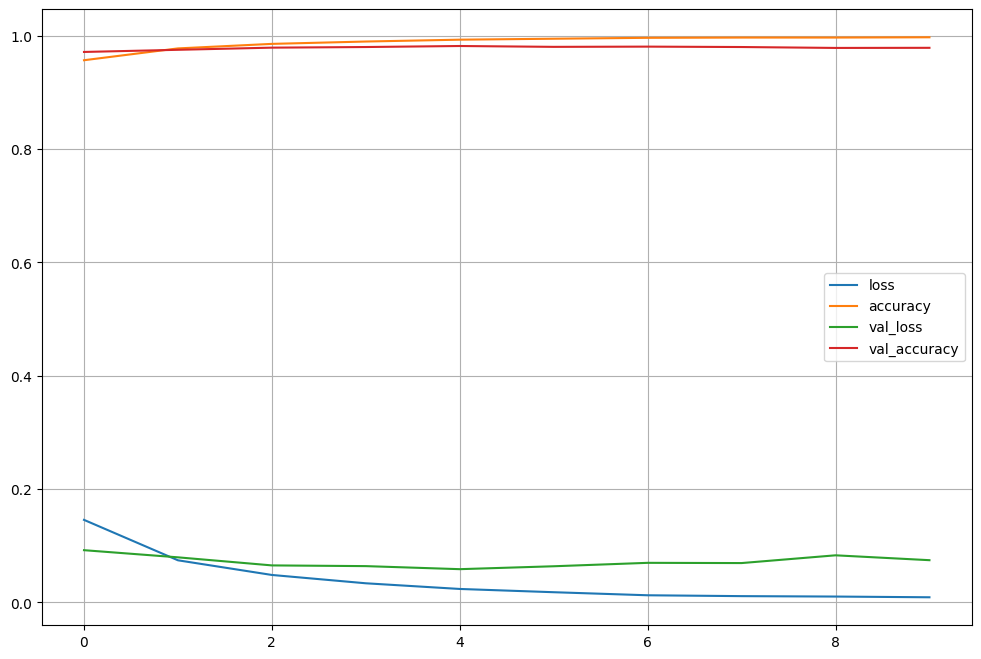

In [100]:
plot_target = hist.history.keys()

plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend(); plt.grid()
plt.show()

#### evaluation

In [102]:
score = model.evaluate(x_test, y_test)
print("Test loss :", score[0])
print("Train loss :", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0745 - accuracy: 0.9786
Test loss : 0.07448840886354446
Train loss : 0.978600025177002


#### wrong_data_check

In [103]:
predicted_result = model.predict(x_test)
# np.argmax최대값의 인덱스 반환
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [106]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [108]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

214

In [109]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[7927,
 1581,
 9009,
 1247,
 3838,
 5642,
 2043,
 4201,
 2730,
 3718,
 545,
 4879,
 4880,
 3117,
 5734,
 1987]

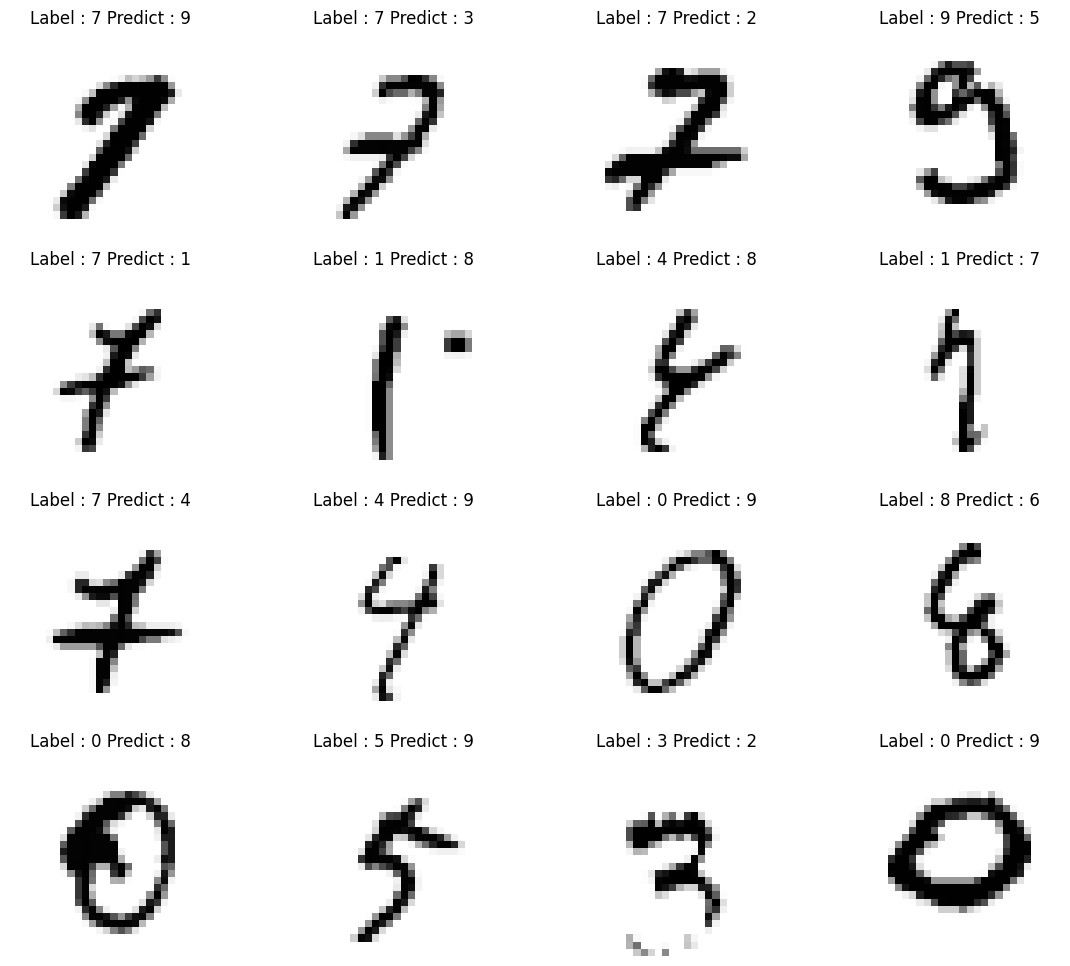

In [111]:
plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap="Greys")
    plt.title("Label : " + str(y_test[n]) + " Predict : " + str(predicted_labels[n]))
    plt.axis("off")
    
plt.show()

## MNIST Fashion

![image](https://user-images.githubusercontent.com/118172599/234796687-a36d99ae-76a8-43cd-859a-e658af75d85f.png)


In [112]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

4422102/4422102 [==============================] - 1s 0us/step


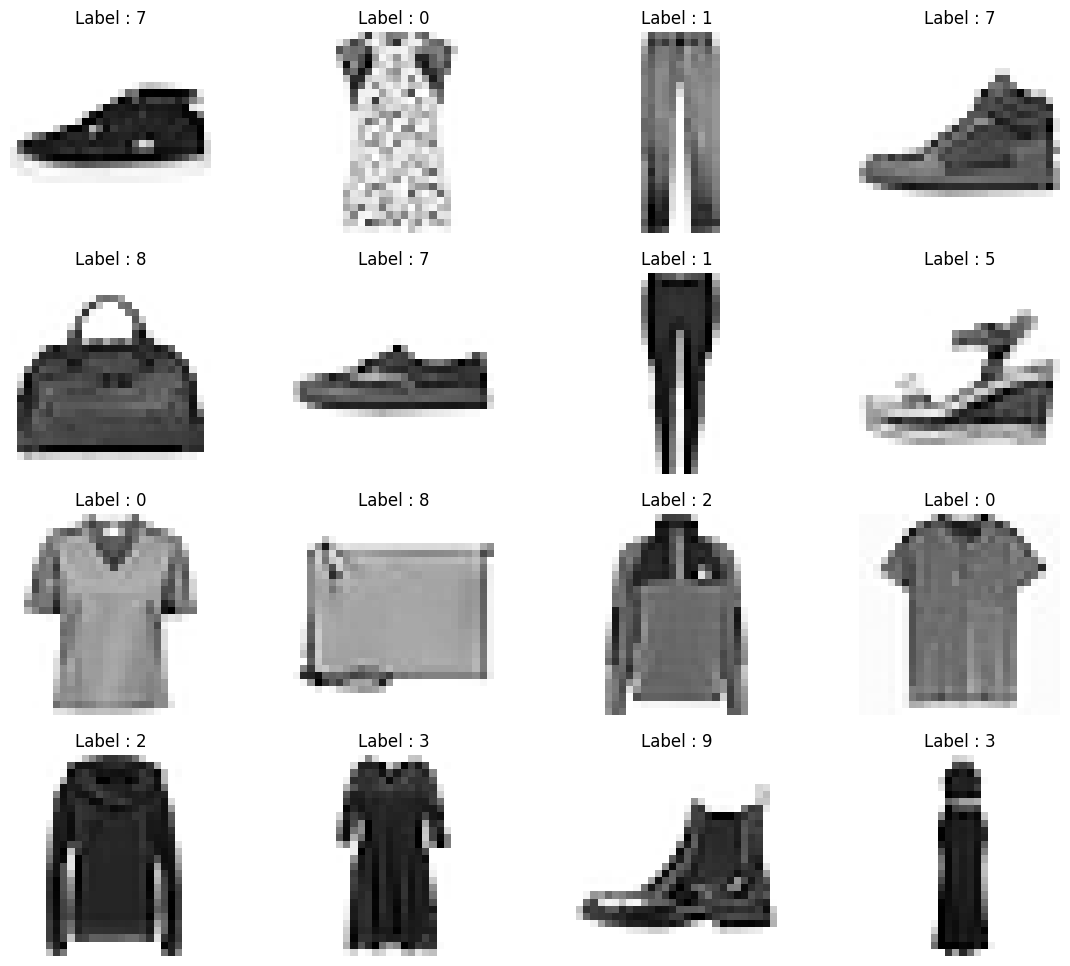

In [115]:
smaples = random.choices(population=range(0, len(y_train)), k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28, 28), cmap="Greys")
    plt.title("Label : " + str(y_train[n]))
    plt.axis("off")

In [122]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss=tf.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [123]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 1000)              785000    
                                                                 
 dense_35 (Dense)            (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [124]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(x_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print("Fit time : ", time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 9s 14ms/step - loss: 0.4836 - accuracy: 0.8285 - val_loss: 4.0778 - val_accuracy: 0.0973
Epoch 2/10
600/600 [==============================] - 8s 13ms/step - loss: 0.3616 - accuracy: 0.8690 - val_loss: 4.1924 - val_accuracy: 0.1019
Epoch 3/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3228 - accuracy: 0.8826 - val_loss: 4.6794 - val_accuracy: 0.1027
Epoch 4/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2958 - accuracy: 0.8921 - val_loss: 4.8663 - val_accuracy: 0.1036
Epoch 5/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2793 - accuracy: 0.8960 - val_loss: 5.0290 - val_accuracy: 0.1026
Epoch 6/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2652 - accuracy: 0.9011 - val_loss: 5.2187 - val_accuracy: 0.1066
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.2505 - accuracy: 0.9061 - val_loss: 5.7567 - val_accuracy: 0.1018

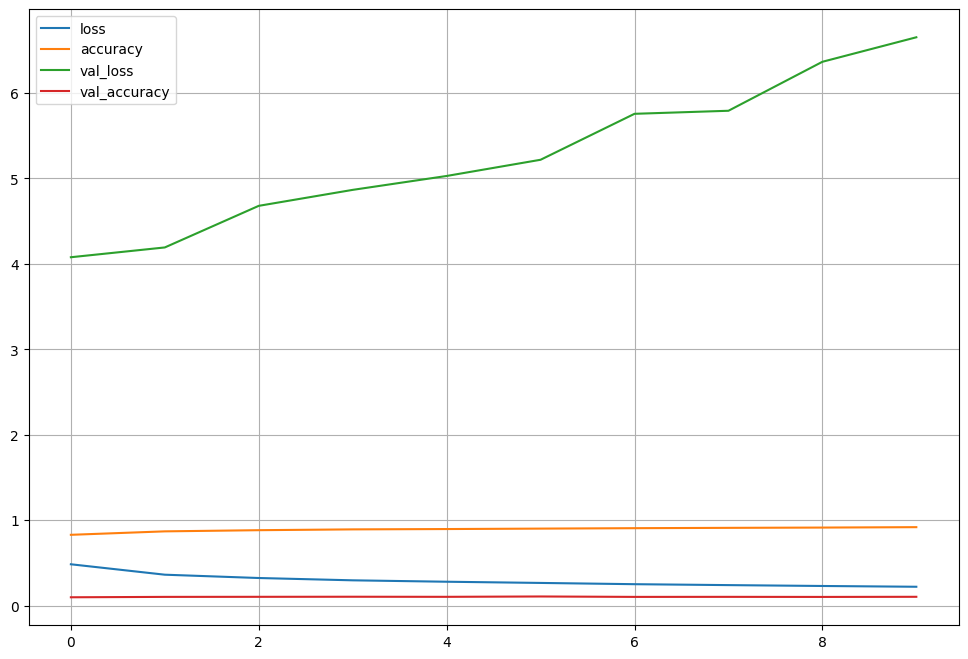

In [125]:
plot_target = hist.history.keys()

plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend(); plt.grid()
plt.show()

In [128]:
score = model.evaluate(X_test, y_test)
print("Test loss :", score[0])
print("Train loss :", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3196 - accuracy: 0.8880
Test loss : 0.3196251392364502
Train loss : 0.8880000114440918


#### wrong_data_check

In [129]:
predicted_result = model.predict(X_test)
# np.argmax최대값의 인덱스 반환
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [130]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [131]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

1120

In [132]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[8534,
 3553,
 1300,
 688,
 5672,
 6500,
 3311,
 2776,
 7258,
 3293,
 548,
 2914,
 5383,
 9601,
 5316,
 2919]

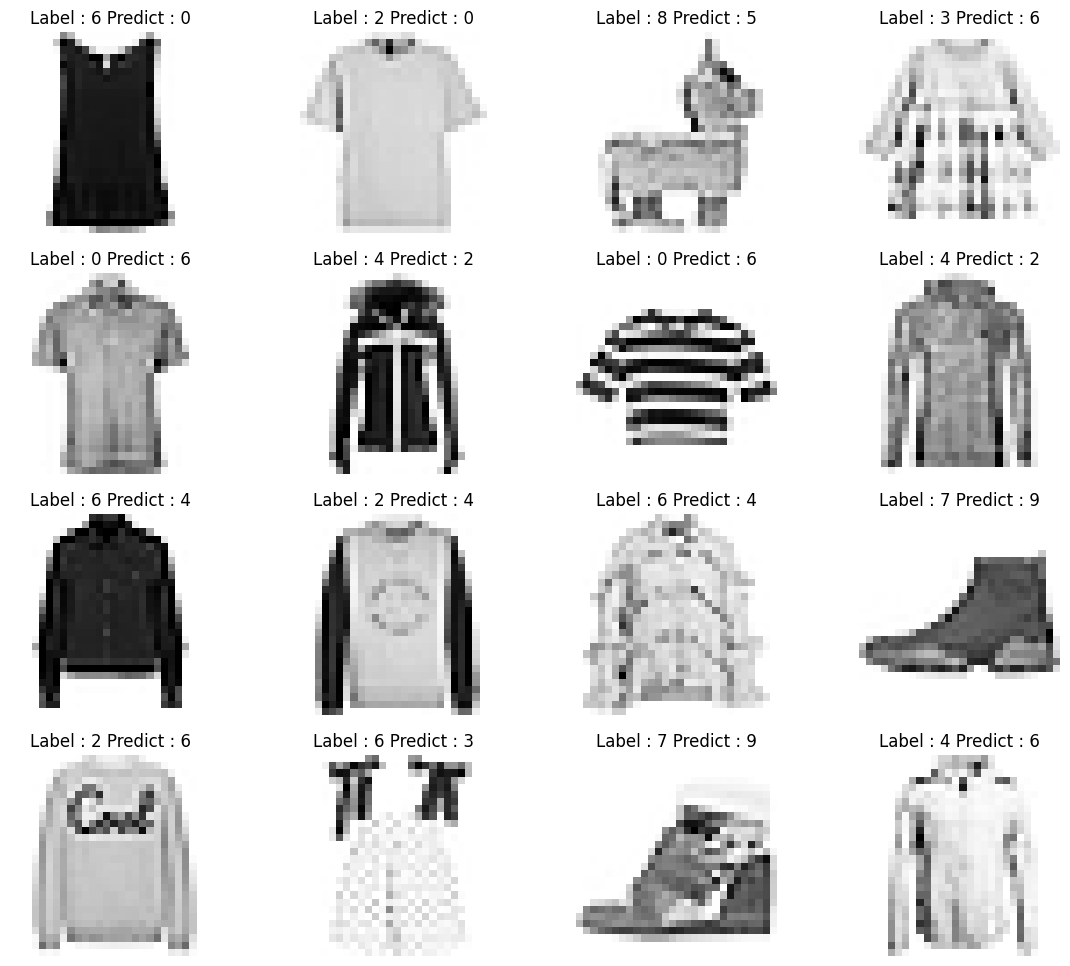

In [134]:
plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap="Greys")
    plt.title("Label : " + str(y_test[n]) + " Predict : " + str(predicted_labels[n]))
    plt.axis("off")
    
plt.show()

# 4. CNN
- Convolutional Neural Network
- 절차
    - 컨벌루션 + ReLU에서 변환
    - Maxpool에서 압축
    - 특징 검출된 압축된 사진을 얻음
    - Flatten()으로 펼쳐서 Dense에 입력
    - Dense를 구성하여 학습
    - 출력층에서 softmax로 결과도출

![image](https://user-images.githubusercontent.com/118172599/234811787-f1714f0e-c79a-4568-975a-25c828796ce4.png)
![image](https://user-images.githubusercontent.com/118172599/234817959-fe9056e9-006f-46fd-b735-c47355100f56.png)
![image](https://user-images.githubusercontent.com/118172599/234817988-6c7b984e-4ae3-48a8-b206-369cd3d076b7.png)
![image](https://user-images.githubusercontent.com/118172599/234818003-e8eb57b9-937a-4a3e-bad3-ffaedc23db8a.png)
![image](https://user-images.githubusercontent.com/118172599/234818150-c5bd9624-e6b0-4c34-8824-0e9b72f7f442.png)
![image](https://user-images.githubusercontent.com/118172599/234818349-306cdb1d-22b2-44c1-8418-490be834f61f.png)
![image](https://user-images.githubusercontent.com/118172599/234818407-19404124-3915-4114-812d-ab595ff321d7.png)


#### Dropout
![image](https://user-images.githubusercontent.com/118172599/234819120-3ebcf69b-7fb8-4af7-932f-57fb21c933f3.png)
![image](https://user-images.githubusercontent.com/118172599/234819137-d45e03e9-bf93-47d5-960b-6843b1314f8d.png)


## 파이썬 코드

In [138]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

#### modeling

In [142]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")              
])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten_10 (Flatten)        (None, 3136)            

#### model.fit

In [143]:
import time

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                 validation_data = (X_test,y_test))
print("Fit time : ", time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 90s 47ms/step - loss: 0.1150 - accuracy: 0.9639 - val_loss: 0.0370 - val_accuracy: 0.9887
Epoch 2/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.0329 - val_accuracy: 0.9887
Epoch 3/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0225 - val_accuracy: 0.9931
Epoch 4/5
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0237 - val_accuracy: 0.9931
Epoch 5/5
1875/1875 [==============================] - 119s 64ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0376 - val_accuracy: 0.9897
Fit time :  530.8780899047852


#### loss_acc_plot

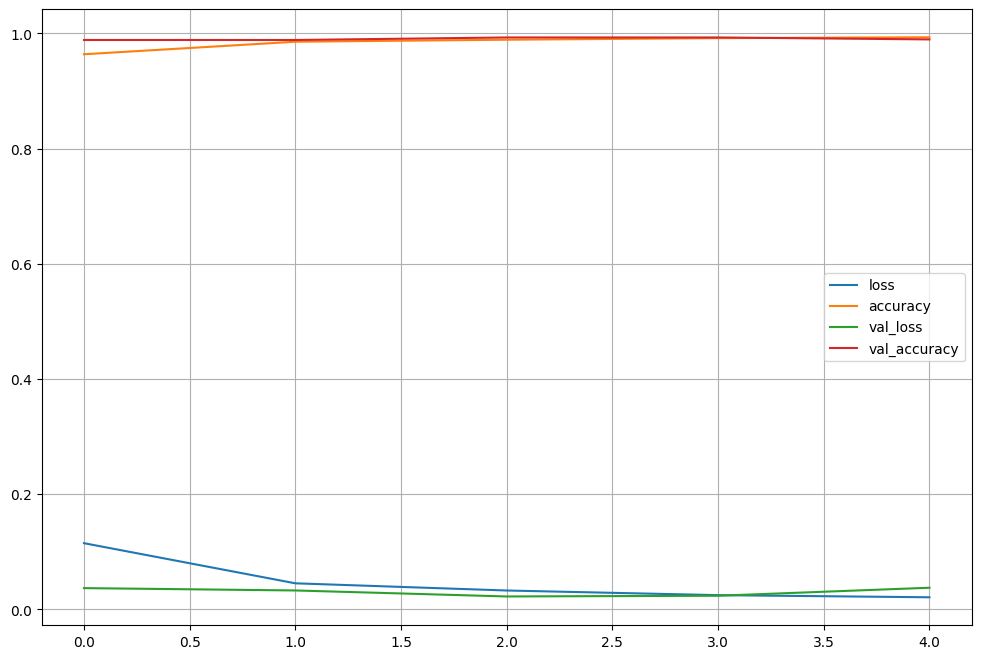

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = hist.history.keys()
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend(); plt.grid()
plt.show()

In [151]:
score = model.evaluate(X_test, y_test)
print("Test loss :", score[0])
print("Train loss :", score[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.0376 - accuracy: 0.9897
Test loss : 0.037608176469802856
Train loss : 0.9897000193595886


#### wrong_data_check

In [152]:
predicted_result = model.predict(X_test)
# np.argmax최대값의 인덱스 반환
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 4s 12ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [153]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [154]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

103

In [155]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[445,
 4740,
 1337,
 9587,
 582,
 7902,
 2293,
 1393,
 646,
 3558,
 1981,
 938,
 3853,
 5265,
 2293,
 3441]

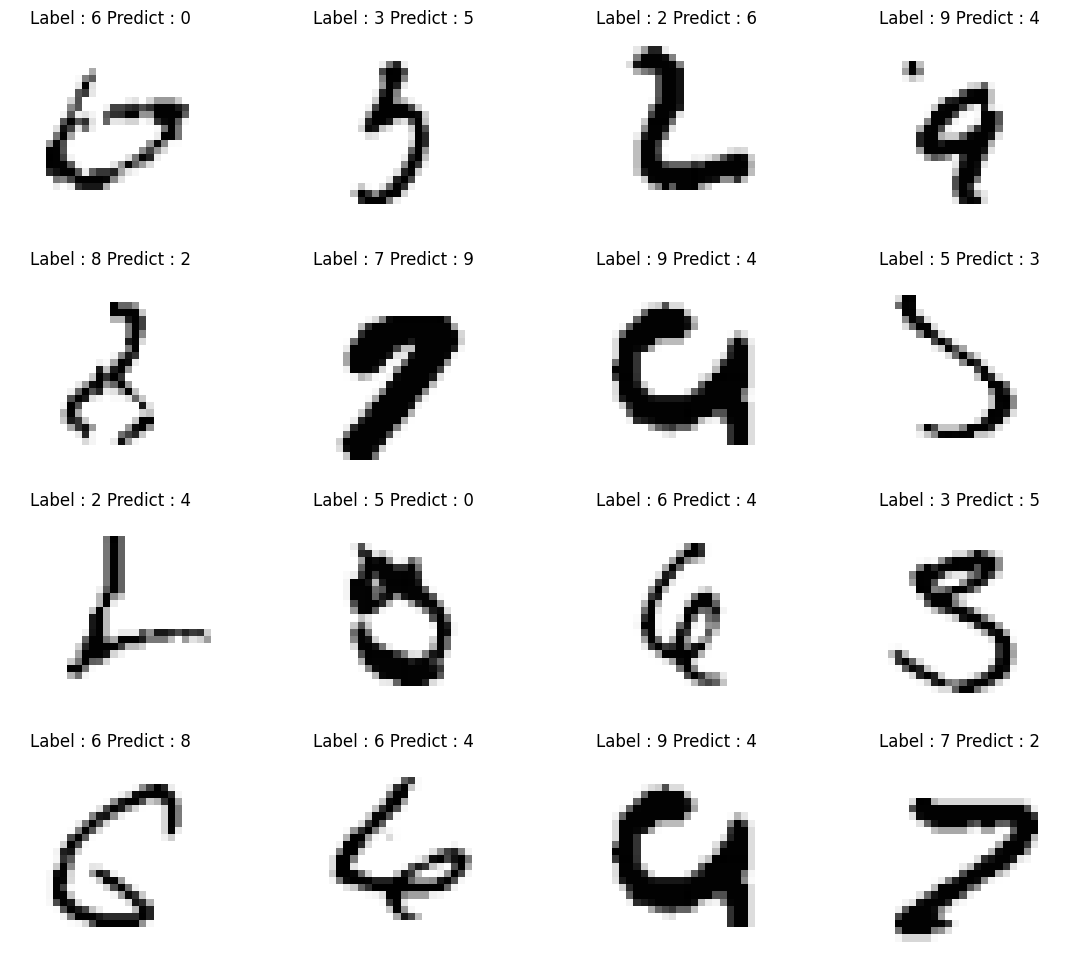

In [156]:
plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap="Greys")
    plt.title("Label : " + str(y_test[n]) + " Predict : " + str(predicted_labels[n]))
    plt.axis("off")
    
plt.show()

#### model.save

In [165]:
import datetime

datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

'20230427-185423'

In [166]:
now_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model.save(f"./checkpoint/MNIST_CNN_model_{now_time}.h5")